In [1]:
import numpy as np
import cv2 as cv
from skimage.morphology import skeletonize
from skimage.feature import hog
import glob
import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from PIL import Image
import imageio
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
df = pd.DataFrame(columns=["year", "ark"])
for a in tqdm.tqdm(glob.glob("skeletons/*.png")):
    ark = a[10:-7]
    #im = cv.imread(a, cv.IMREAD_GRAYSCALE).astype(np.uint16)
    row = data.loc[data.ark == "12148_"+ark]
    year = row.date.values[0]
    df = df.append({"year":year, "ark": ark}, ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████| 346/346 [00:00<00:00, 661.84it/s]


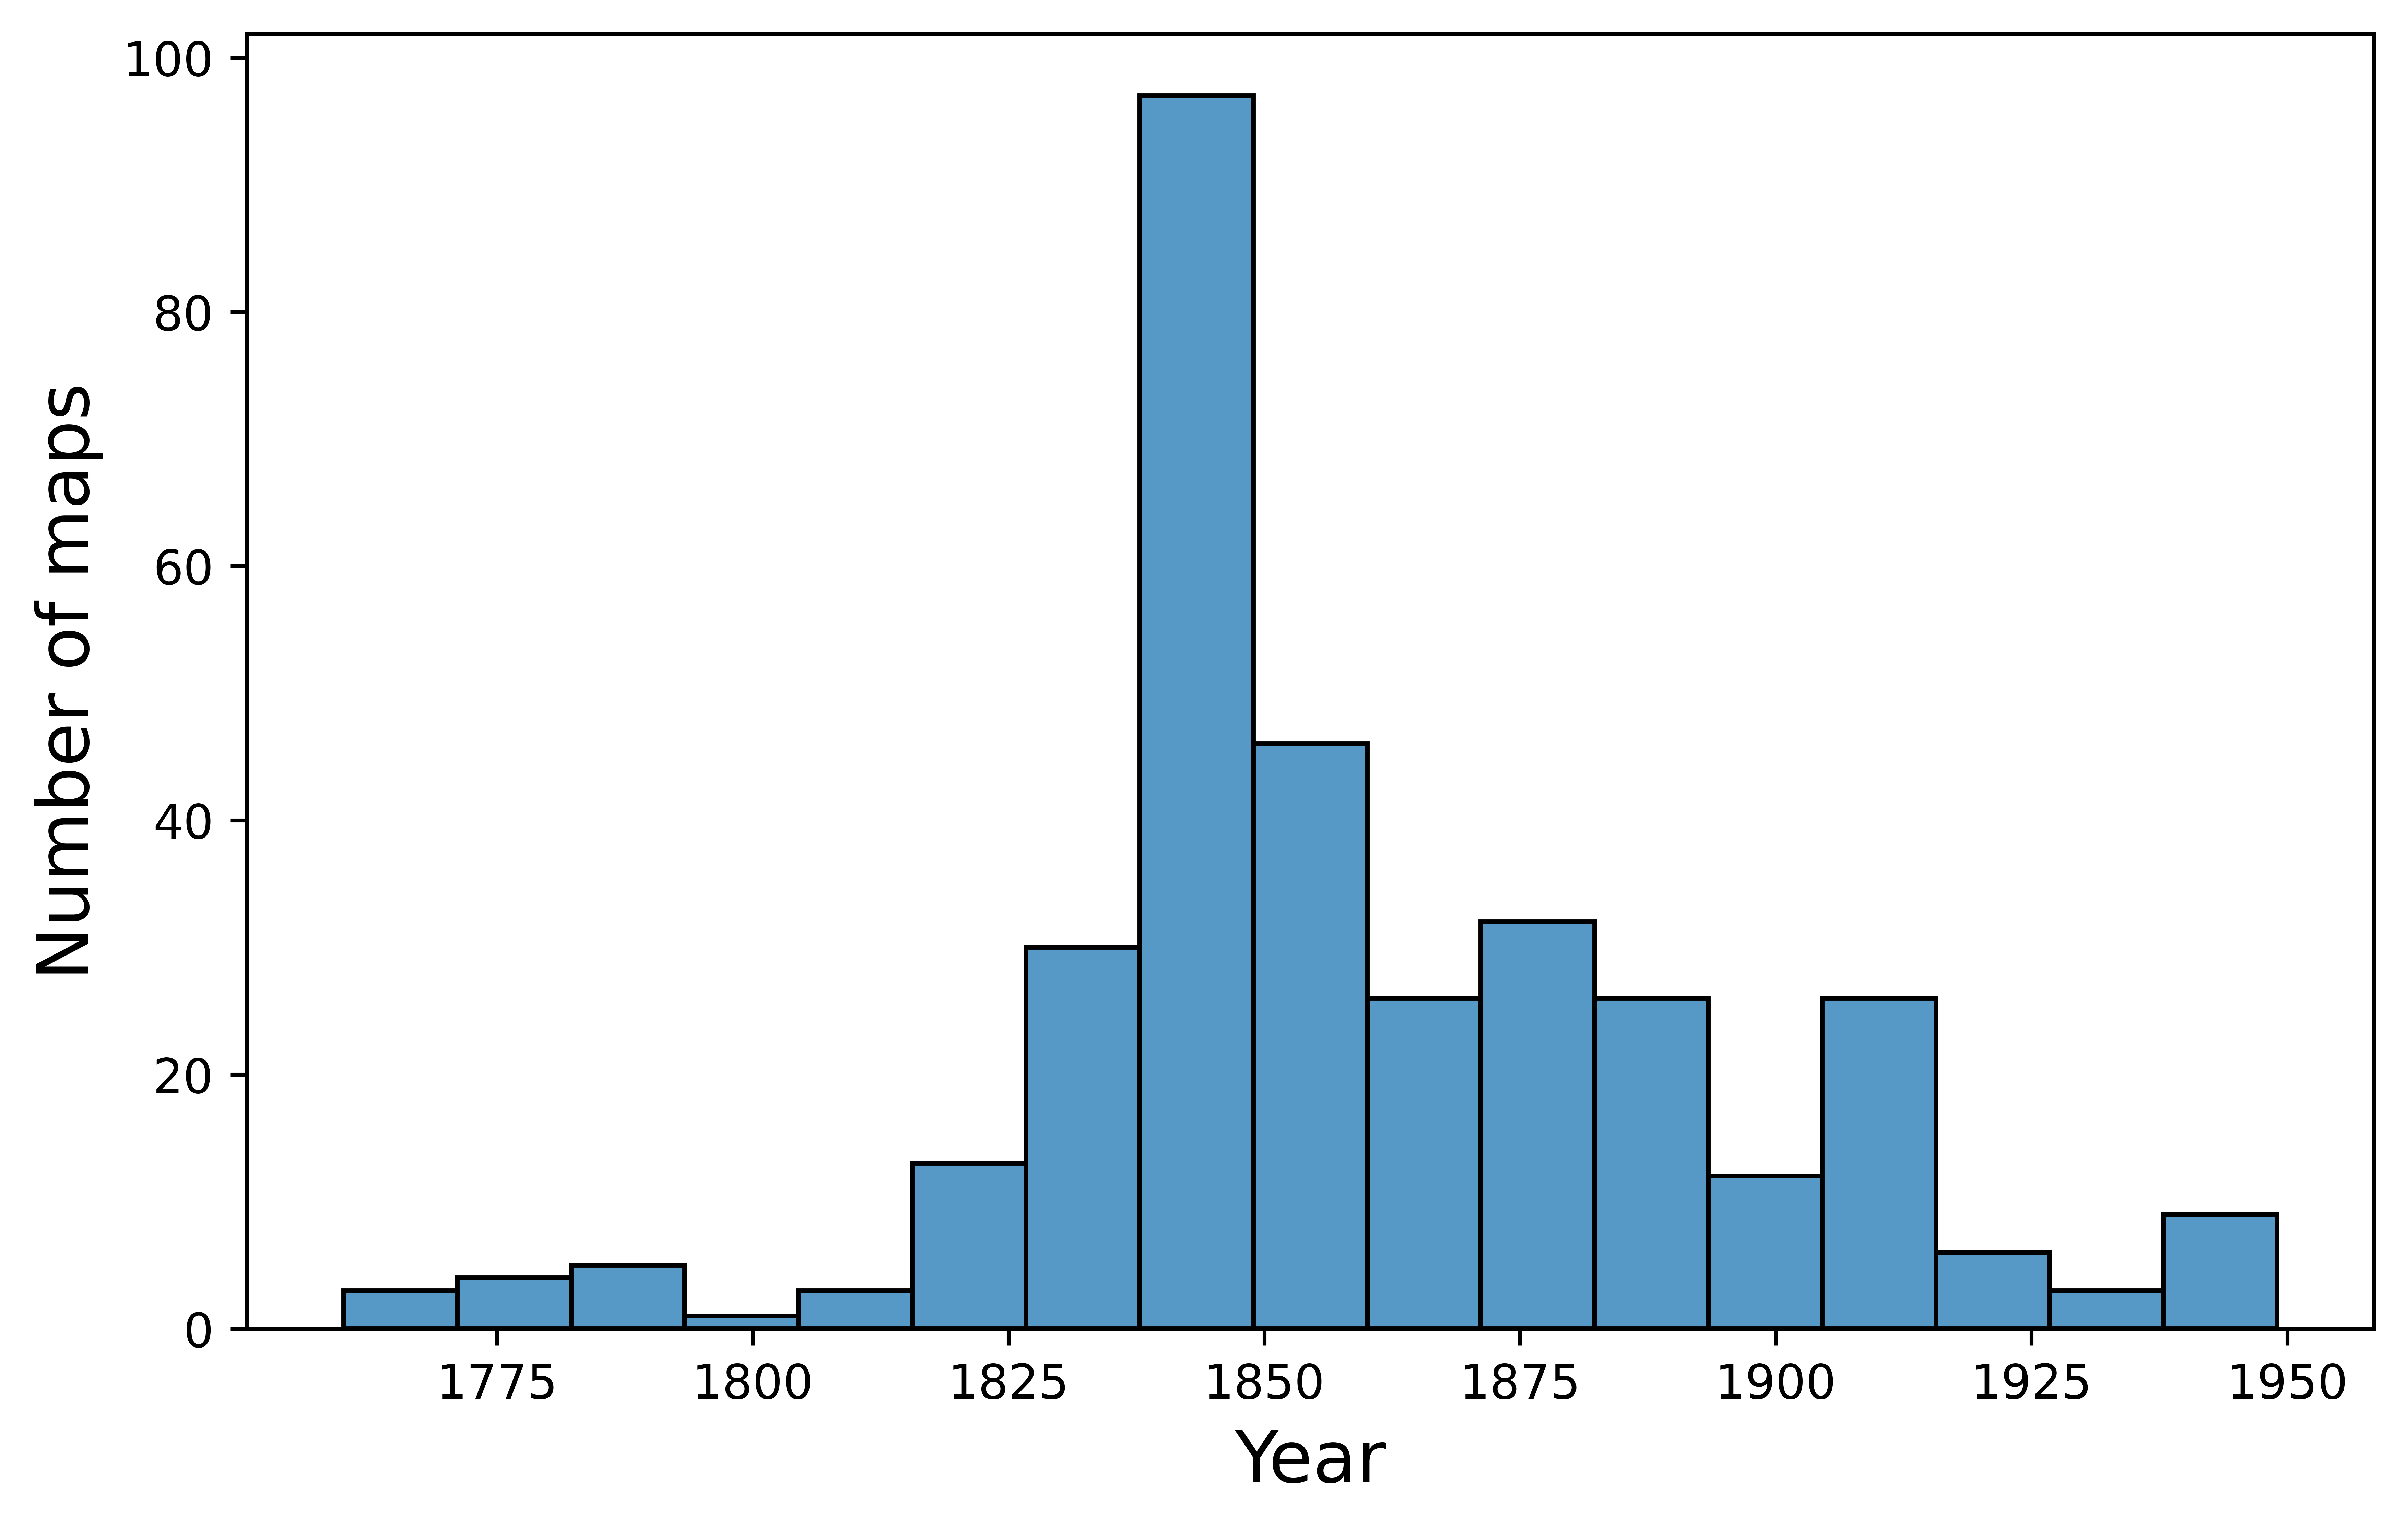

In [5]:
f, ax = plt.subplots(figsize=(8, 5), dpi=1000)
ax = sns.histplot(data=df, x="year")
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Number of maps", fontsize = 15)
ax.get_figure().savefig("distr_of_years.png")

In [50]:
sample_arks = list(df.sample(30).ark)

for i,a in tqdm.tqdm(enumerate(glob.glob("skeletons/*.png"))):
    if i == 0:
        final_image = np.zeros_like(cv.imread(a))
    ark = a[10:-7]
    if not ark in sample_arks:
        continue
    final_image += cv.imread(a)*255
plt.imsave("overlapping_maps2.png", final_image)

346it [00:22, 15.21it/s]
